# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
raw_data = pd.read_csv('Data/hotel_bookings.csv')
raw_data.sample(8)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
21834,Resort Hotel,0,2,2016,March,11,9,0,3,2,...,No Deposit,240.0,NaN,0,Transient,77.33,1,1,Check-Out,12-03-16
62,Resort Hotel,0,17,2015,July,27,2,0,3,2,...,No Deposit,250.0,NaN,0,Transient,133.00,0,1,Check-Out,05-07-15
110134,City Hotel,0,68,2017,April,16,21,0,2,2,...,No Deposit,9.0,NaN,0,Transient,126.00,0,3,Check-Out,23-04-17
8491,Resort Hotel,1,157,2016,October,40,1,2,2,2,...,Non Refund,96.0,NaN,0,Transient,52.00,0,0,Canceled,09-05-16
14469,Resort Hotel,0,13,2017,January,3,21,0,1,2,...,No Deposit,240.0,NaN,0,Transient,48.00,0,2,Check-Out,22-01-17
48309,City Hotel,1,60,2016,March,13,20,2,2,2,...,Non Refund,3.0,NaN,0,Transient,75.00,0,0,Canceled,22-01-16
106799,City Hotel,0,44,2017,February,9,27,1,3,3,...,No Deposit,9.0,NaN,0,Transient-Party,102.00,0,2,Check-Out,03-03-17
48312,City Hotel,1,60,2016,March,13,20,2,2,2,...,Non Refund,3.0,NaN,0,Transient,75.00,0,0,Canceled,22-01-16


## 1. Data Collection


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

- There are 32 columns in the dataset.
- The dataset contains 119,390 rows.
- Data Types:
    - 1. 16 columns are of int64 data type.
    - 2. 4 columns are of float64 data type.
    - 3. 12 columns are of object data types. 
- Missing Values:
    - The column `children` has <span style="color:red">4</span> missing values.
    - The column `country` has <span style="color:red">488</span> missing values.
    - The column `agent` has <span style="color:red">16,340</span> missing values.
    - The column `company` has <span style="color:red">112,593</span> missing values.


## 2 Exploratory Data Analysis (EDA)

### 2.1 Looking for missing values.

In [5]:
raw_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

- Dropping null values is easy but isn't a good practice, so we will start with replacing them with zero.

In [6]:
raw_data.fillna(0, inplace=True)

### 2.2 cleaning Data

In [7]:
raw_data.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2016.156554,0.707476,2015.00,2016.00,2016.000,2017.0,2017.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_week_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119390.0,0.103886,0.398555,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


In [8]:
# Display rows with negative adr values
negative_adr_rows = raw_data[raw_data['adr'] < 0]
display(negative_adr_rows)

# Drop rows with negative adr values
raw_data.drop(negative_adr_rows.index, inplace=True)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,...,No Deposit,273.0,0.0,0,Transient-Party,-6.38,0,0,Check-Out,15-03-17


- adr can not be negative so dropping it.

In [9]:
# Assuming you have a DataFrame named 'df'
raw_data.drop(raw_data[(raw_data['children'] == 0) & (raw_data['adults'] == 0)].index, inplace=True)

### 2.3 Feature Selection

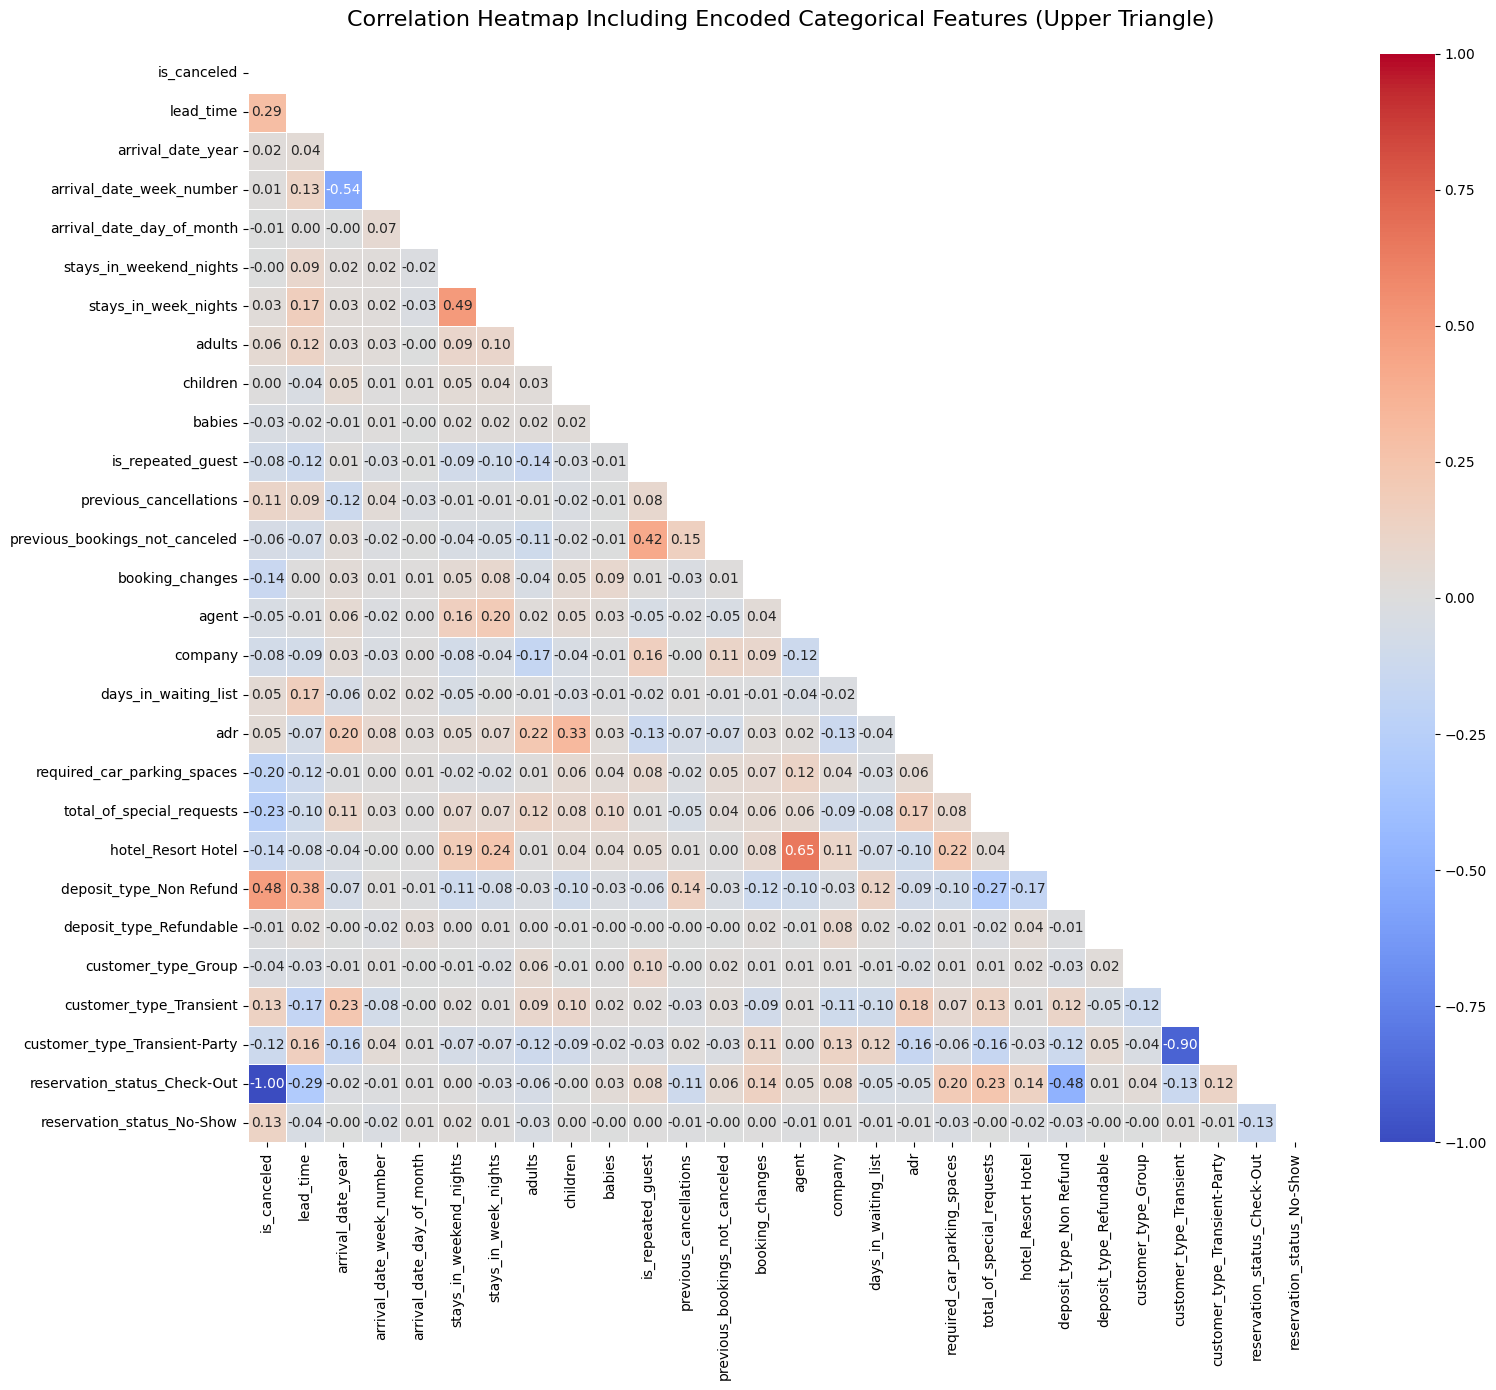

In [10]:
numeric_columns = raw_data.select_dtypes(include=[np.number]).columns.tolist()

categorical_cols_to_include = ['hotel', 'deposit_type', 'customer_type', 'reservation_status']

df_analysis = raw_data[numeric_columns + categorical_cols_to_include].copy()

df_encoded = pd.get_dummies(df_analysis, columns=categorical_cols_to_include, drop_first=True)

correlation_matrix_full = df_encoded.corr()

mask = np.triu(np.ones_like(correlation_matrix_full, dtype=bool))

plt.figure(figsize=(16, 14))
sns.heatmap(correlation_matrix_full, 
            mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm', 
            vmin=-1, 
            vmax=1, 
            center=0, 
            square=False, 
            linewidths=0.5)

plt.title('Correlation Heatmap Including Encoded Categorical Features (Upper Triangle)', fontsize=16, pad=20)
plt.xticks(rotation=90)  
plt.yticks(rotation=0)   
plt.tight_layout()
plt.show()


In [11]:
raw_data = raw_data.drop(['reservation_status', 'reservation_status_date'], axis=1)

In [12]:
raw_data.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests'],
      dtype='object')

/tmp/ipykernel_111478/3306271881.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y=column, data=raw_data, palette="Set3")
/tmp/ipykernel_111478/3306271881.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y=column, data=raw_data, palette="Set3")
/tmp/ipykernel_111478/3306271881.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='is_canceled', y=column, data=raw_data, palette="Set3")
/tmp/ipykernel_111478/3306271881.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated an

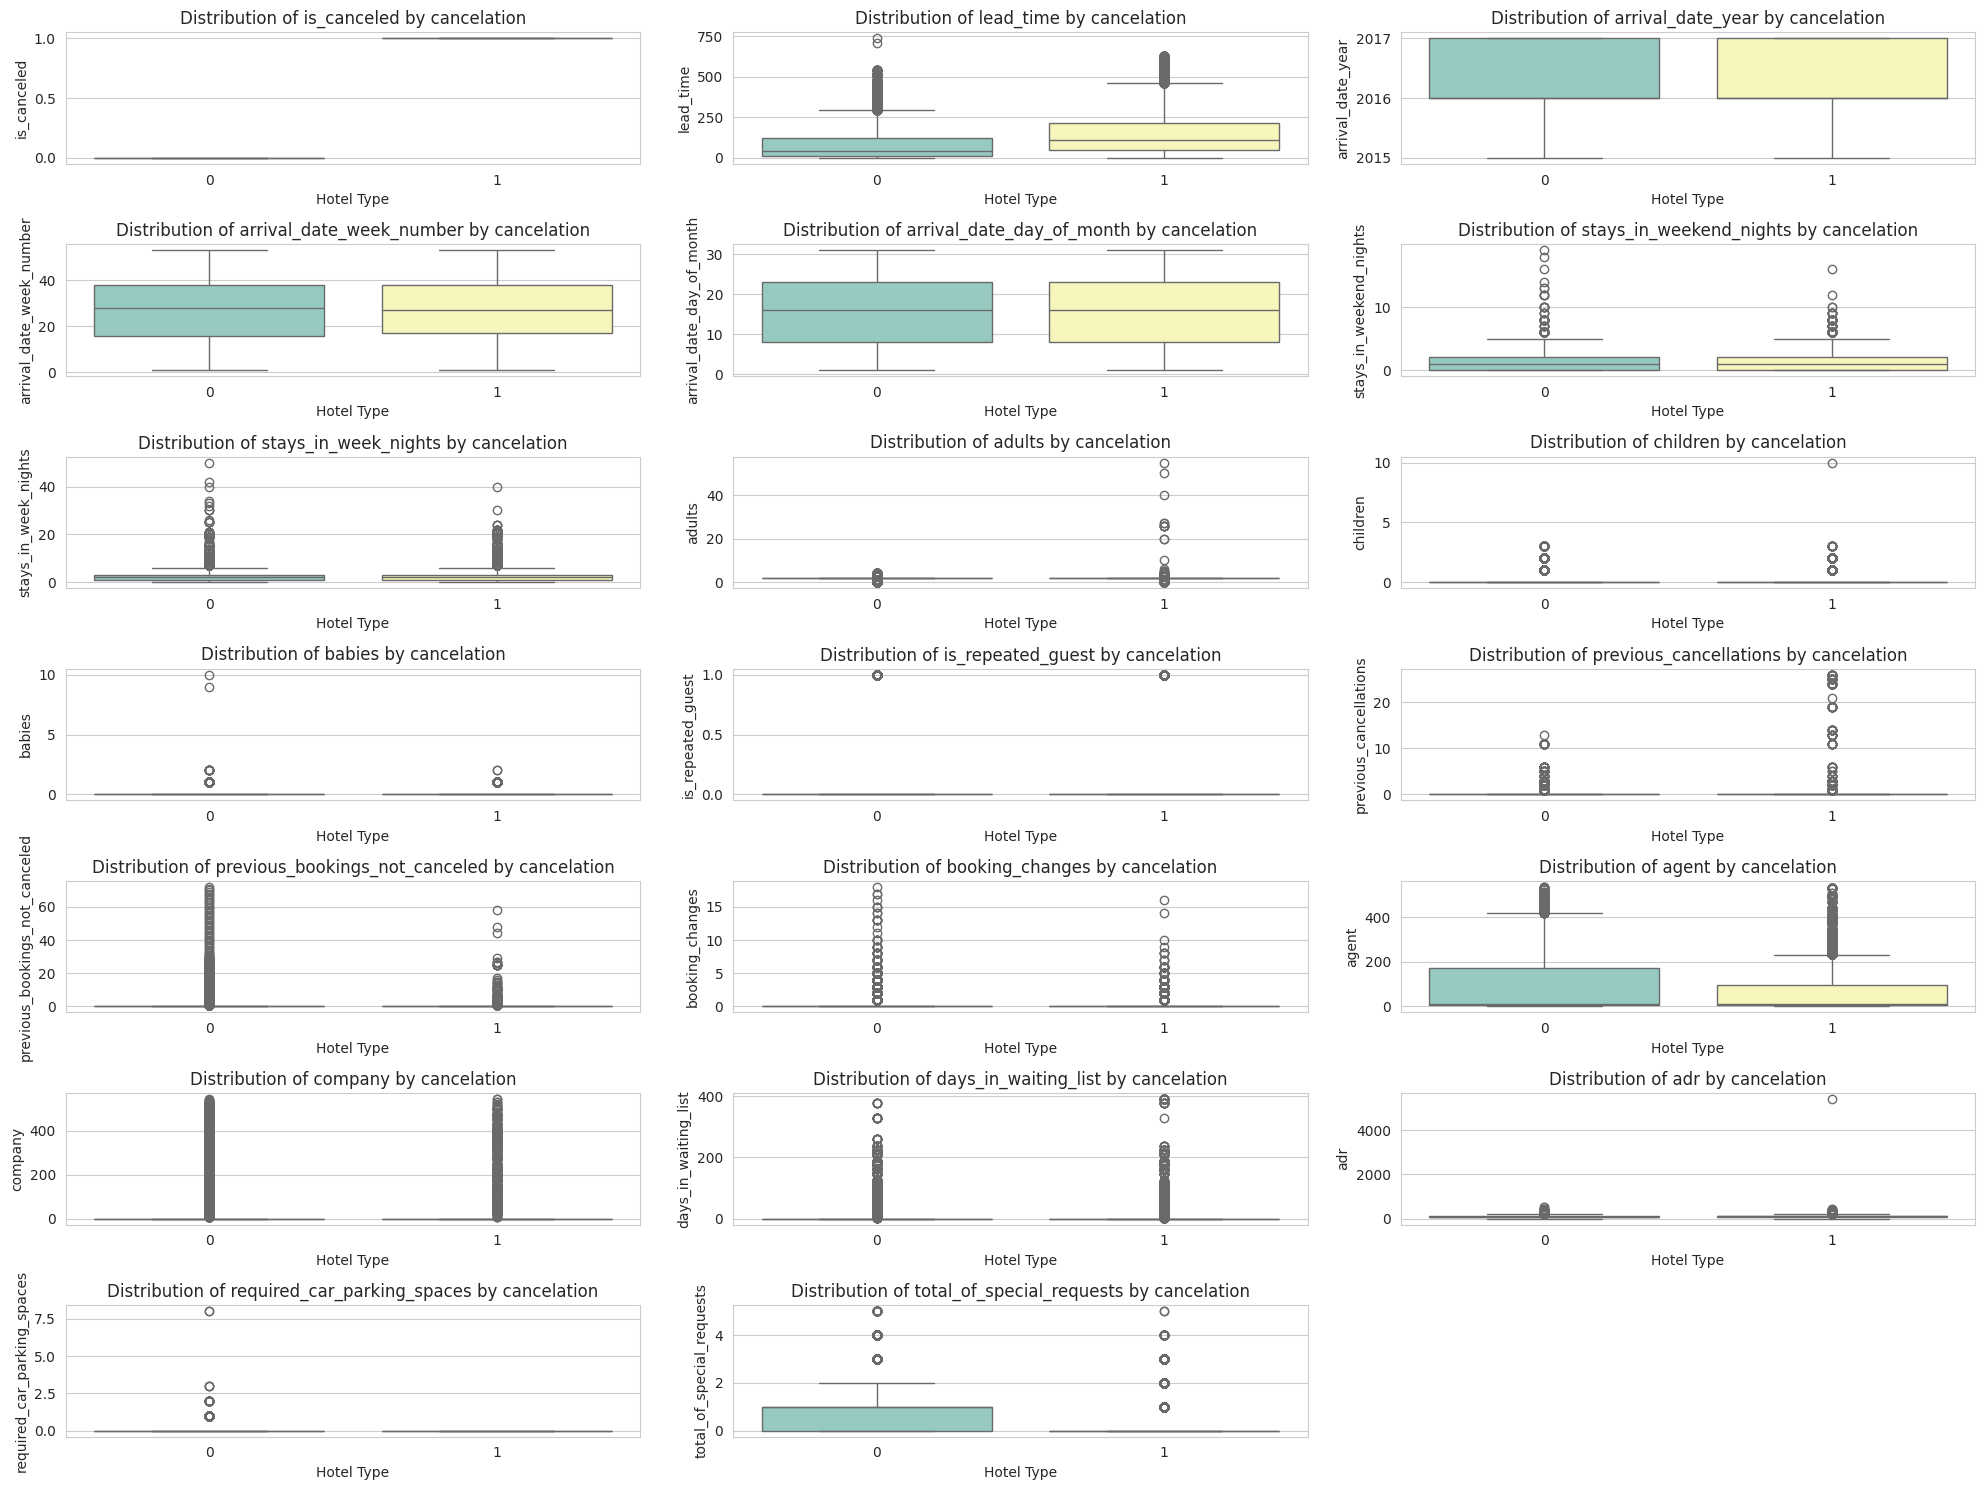

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Get numeric columns for plotting
numeric_columns = raw_data.select_dtypes(include=[np.number]).columns.tolist()

# Set up the figure size and style
plt.figure(figsize=(20, 15))
sns.set_style("whitegrid")

# Create a subplot grid based on number of numeric columns
n_cols = 3  # Number of columns in the subplot grid
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Calculate required rows

# Create box plots for each numeric column
for i, column in enumerate(numeric_columns):
    plt.subplot(n_rows, n_cols, i+1)
    
    # Create box plot with hotel as hue
    sns.boxplot(x='is_canceled', y=column, data=raw_data, palette="Set3")
    
    # Add title and labels
    plt.title(f'Distribution of {column} by cancelation', fontsize=12)
    plt.xlabel('Hotel Type', fontsize=10)
    plt.ylabel(column, fontsize=10)
    
    # Rotate x-axis labels if needed
    plt.xticks(rotation=0)

# Adjust layout
plt.tight_layout()
plt.show()

In [15]:
raw_data.to_csv('hotel_data_cleaned.csv', index=False)


In [17]:
raw_dataq = pd.read_csv('hotel_data_cleaned.csv')

In [18]:
raw_dataq


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0.0,0.0,0,Transient,0.00,0,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0.0,0.0,0,Transient,0.00,0,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0.0,0.0,0,Transient,75.00,0,0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,304.0,0.0,0,Transient,75.00,0,0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,240.0,0.0,0,Transient,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119204,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,394.0,0.0,0,Transient,96.14,0,0
119205,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,9.0,0.0,0,Transient,225.43,0,2
119206,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,9.0,0.0,0,Transient,157.71,0,4
119207,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,89.0,0.0,0,Transient,104.40,0,0
